# Linear regression

The simplest model that we can fit to data is a line. When we find a line that fits a set of data best, we are performing Linear Regression

A line is an approximation, but it allows to explain and predict variables that have a linear relationship with each other. 

A line is determined by its slope and its intercept, for each point "y" on a line we can say:

$$y=mx+b$$


where m is the slope, and b is the intercept, y is a given point on the y-axis, and it corresponds to a given x on the x-axis.

The slope is a measure of how steep the line is, while the intercept is a measure of where the line hits the y-axis.
When we perform Linear Regression, the goal is to get the “best” m and b for our data. 

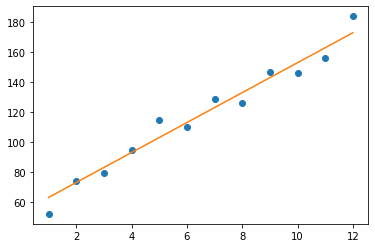

In [2]:
import matplotlib.pyplot as plt

#variables
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

#slope:
m = 10

#intercept:
b = 53

#linear regression  
y_predicted = [m*i + b for i in x]

#regression graph
plt.plot(x, y, "o")
plt.plot(x, y_predicted)

plt.show()


We have to define is what the best fit, for each data point we calculate loss, a number that measures how bad the model's  prediction was.

The goal of a linear regression model is to find the slope and intercept pair that minimizes loss on average across all of the data.

## Gradient Descent 

As we try to minimize loss, we take each parameter we are changing, and move it as long as we are decreasing loss. It’s like we are moving down a hill, and stop once we reach the bottom:

The process by which we do this is called gradient descent. We move in the direction that decreases our loss the most. 

To find the gradient of loss as intercept changes, the formula comes out to be:

$$ \frac{2}{N} \sum_{i=1}^{N} - (y_{i} - (mx_{i} + b)) $$

To find the m gradient, or the way the loss changes as the slope of our line changes, we can use this formula:

$$ \frac{2}{N} \sum_{i=1}^{N} - x_{i}(y_{i} - (mx_{i} + b)) $$

Once we have a way to calculate both the m gradient and the b gradient, we’ll be able to follow both of those gradients downwards to the point of lowest loss for both the m value and the b value. Then, we’ll have the best m and the best b to fit our data



In [3]:
#Gradient Descent for Slope
def get_gradient_at_b(x, y, b, m):
    N = len(x)
    diff = 0
    for i in range(N):
        x_val = x[i]
        y_val = y[i]
        diff += (y_val - ((m * x_val) + b))
    b_gradient = -(2/N) * diff  
    return b_gradient

#Gradient Descent for Slope
def get_gradient_at_m(x, y, b, m):
    N = len(x)
    diff = 0
    for i in range(N):
        x_val = x[i]
        y_val = y[i]
        diff += x_val * (y_val - ((m * x_val) + b))
    m_gradient = -(2/N) * diff  
    return m_gradient

Now that we know how to calculate the gradient, we want to take a “step” in that direction. However, it’s important to think about whether that step is too big or too small. We don’t want to overshoot the minimum error!
We can scale the size of the step by multiplying the gradient by a learning rate.

How will we know when our program has learned enough?. Convergence is when the loss stops changing (or changes very slowly) when parameters are changed.
Hopefully, the algorithm will converge at the best values for the parameters m and b.

In [4]:
#Step gradient function:
def step_gradient(b_current, m_current, x, y, learning_rate):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return [b, m]
  
#Gradient descent function:  
def gradient_descent(x, y, learning_rate, num_iterations):
    b = 0
    m = 0
    for i in range(num_iterations):
        b, m = step_gradient(b, m, x, y, learning_rate)
    return [b,m]  


## Linear regression:  VIX returns and S&P returns

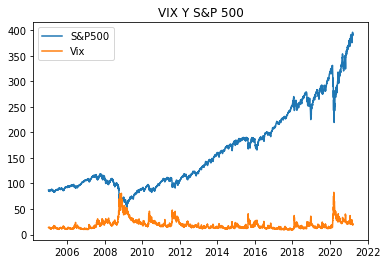

In [5]:
#Import libraries
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import wb
from datetime import datetime
import pandas_datareader.data as web
import numpy as np
from datetime import date

#Import the data 
start = datetime(2005, 1, 1)
end = date.today()
tickers = ['spy','^VIX']
data = web.get_data_yahoo(tickers, start, end)

#Plot the data
plt.title('VIX Y S&P 500')
plt.plot(data['Adj Close'])
plt.legend(['S&P500','Vix'])
plt.show()


## Get continuous returns 

The logarithmic rate of return, also known as the continuously compounded return. This is the expected return for an investment where the earnings are assumed to be continually reinvested over the time period. It is calculated by taking the difference between the log of the ending price and the log of the starting price.

$$r = log(\frac{V_{1}}{V_{0}})$$

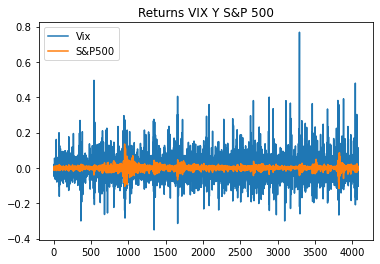

In [6]:
#calculate logarithmic returns
def calculate_log_return(start_price, end_price):
    return np.log(end_price/start_price)
  
#get the returns of the series    
def get_returns(prices):
    returns = []
    for i in range(len(prices)-1):
        start_price = prices[i]
        end_price = prices[i+1]
        returns.append(calculate_log_return(start_price,end_price))
    return returns


vix_r = get_returns(data['Adj Close']['^VIX'])
spy_r = get_returns(data['Adj Close']['spy'])
plt.plot(vix_r)
plt.plot(spy_r)
plt.title('Returns VIX Y S&P 500')
plt.legend(['Vix','S&P500'])
plt.show()



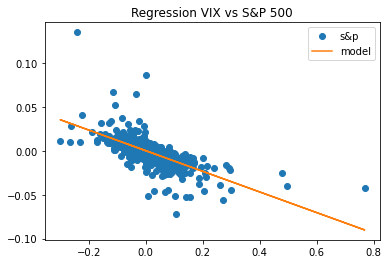

y = 0.00039400317703326064 -0.11783015638338604x


In [8]:
from sklearn.model_selection import train_test_split

#split the data
vix_r_train, vix_r_test, spy_r_train, spy_r_test = train_test_split(vix_r,spy_r, train_size=0.8, test_size=0.2)

#get parameters using 0.3 as learning rate
b, m = gradient_descent(vix_r_train, spy_r_train, 0.3, 1000)

#Linear regression 
y_predicted = [m*x + b for x in vix_r_test]

plt.plot(vix_r_test, spy_r_test, "o")
plt.plot(vix_r_test, y_predicted)
plt.title('Regression VIX vs S&P 500')
plt.legend(['s&p','model'])

plt.show()

print('y = ' + str(b)  +' '+ str(m) + 'x')





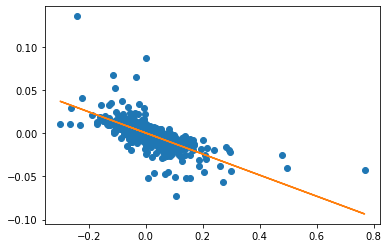

y = 0.000389331574715256 -0.12221411914923432x


In [9]:
#Linear regression with sklearn 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np


vix_r_train = np.array(vix_r_train)
spy_r_train = np.array(spy_r_train)
vix_r_test  = np.array(vix_r_test)


vix_r_train = vix_r_train.reshape(-1, 1)
spy_r_train = spy_r_train.reshape(-1,1)
vix_r_test = vix_r_test.reshape(-1,1)

line_fitter = LinearRegression()
line_fitter.fit(vix_r_train,spy_r_train )
spy_predict = line_fitter.predict(vix_r_test)

plt.plot(vix_r_test,spy_r_test,'o')
plt.plot(vix_r_test, spy_predict)

plt.show()
b = line_fitter.intercept_[0]
m = line_fitter.coef_[0][0]
print('y = ' + str(b)  +' '+ str(m)  + 'x')
